In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [ ]:
# Change this
dataset_url = 'https://www.kaggle.com/sudalairajkumar/covid19-in-usa' 

In [ ]:
import opendatasets as od
od.download(dataset_url)

In [1]:
data_dir = './covid19-in-usa'

In [2]:
import os
os.listdir(data_dir)

['us_counties_covid19_daily.csv',
 'us_covid19_daily.csv',
 'us_states_covid19_daily.csv']

In [3]:
project_name = "course-project-usa-covid-cases" 

In [4]:
!pip install jovian --upgrade -q

In [5]:
import jovian

In [6]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "patlfer0078/course-project-usa-covid-cases" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/patlfer0078/course-project-usa-covid-cases


'https://jovian.ml/patlfer0078/course-project-usa-covid-cases'

In [7]:
import pandas as pd

In [8]:
counties_df = pd.read_csv('covid19-in-usa/us_counties_covid19_daily.csv')

In [9]:
us_daily_df = pd.read_csv('covid19-in-usa/us_covid19_daily.csv')

In [10]:
states_df = pd.read_csv('covid19-in-usa/us_states_covid19_daily.csv')

### counties_df

In [11]:
counties_df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
573333,2020-09-26,Sweetwater,Wyoming,56037.0,332,2
573334,2020-09-26,Teton,Wyoming,56039.0,536,1
573335,2020-09-26,Uinta,Wyoming,56041.0,350,2
573336,2020-09-26,Washakie,Wyoming,56043.0,113,6


In [12]:
counties_df.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [13]:
counties = counties_df.county.unique()
counties

array(['Snohomish', 'Cook', 'Orange', ..., 'De Baca', 'Daggett', 'Borden'],
      dtype=object)

In [14]:
counties.shape

(1924,)

In [15]:
states_from_counties = counties_df.state.unique()
states_from_counties

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'], dtype=object)

In [16]:
states_from_counties.shape

(55,)

In [17]:
texas_counties_df = counties_df[counties_df.state == 'Texas']
texas_counties_df

,date,county,state,fips,cases,deaths
143,2020-02-12,Bexar,Texas,48029.0,1,0
154,2020-02-13,Bexar,Texas,48029.0,2,0
165,2020-02-14,Bexar,Texas,48029.0,2,0
176,2020-02-15,Bexar,Texas,48029.0,2,0
187,2020-02-16,Bexar,Texas,48029.0,2,0
...,...,...,...,...,...,...
572961,2020-09-26,Wood,Texas,48499.0,525,23
572962,2020-09-26,Yoakum,Texas,48501.0,224,5
572963,2020-09-26,Young,Texas,48503.0,314,6
572964,2020-09-26,Zapata,Texas,48505.0,333,6


In [18]:
texas_counties_df.describe()

,fips,cases,deaths
count,42684.000000,42685.000000,42685.000000
mean,48252.177818,1170.632705,21.987068
std,147.226154,6017.963702,115.153581
min,48001.000000,0.000000,0.000000
25%,48125.000000,11.000000,0.000000
50%,48249.000000,67.000000,1.000000
75%,48377.000000,358.000000,8.000000
max,48507.000000,140868.000000,2572.000000


### us_daily_df

In [19]:
us_daily_df

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,totalTestResults,lastModified,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200927,56,7080459,90648092,11136.0,29432.0,404083.0,6080.0,20049.0,1511.0,...,101298794,2020-09-27T00:00:00Z,0,0,307,758,665609,35289,806258,e7c64e674bfc2af02802153452e53628d44c241c
1,20200926,56,7045170,89982483,11183.0,29554.0,403325.0,6057.0,20002.0,1509.0,...,100492536,2020-09-26T00:00:00Z,0,0,866,1154,886140,47733,1004261,e98f5076c72de4a27a283d22756b7d0b9a44d41f
2,20200925,56,6997437,89096343,10905.0,29769.0,402171.0,6133.0,19919.0,1506.0,...,99488275,2020-09-25T00:00:00Z,0,0,844,1331,856519,55526,1011675,8d311e73fe038522a1a6be4bc3202de206ec0adb
3,20200924,56,6941911,88239824,12008.0,30043.0,400840.0,6168.0,19555.0,1560.0,...,98476600,2020-09-24T00:00:00Z,0,0,921,1588,823449,43772,940353,375a88dd29991abc1946cd7f98f4f20a9e37fb5d
4,20200923,56,6898139,87416375,10535.0,29905.0,399252.0,6113.0,19452.0,1544.0,...,97536247,2020-09-23T00:00:00Z,0,0,1157,1451,800878,38567,923704,b4fe7067370631b26f8e988fd2524b5691235a09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,20200126,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-26T00:00:00Z,0,0,0,0,0,0,0,88a196879207bd090a61fb515beb301e84377977
246,20200125,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-25T00:00:00Z,0,0,0,0,0,0,0,43330e2f11d476ebcdd85e1a47551958e4c1e7ea
247,20200124,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-24T00:00:00Z,0,0,0,0,0,0,0,5f7a0cce04041596513629d55777a16f3aa65e8b
248,20200123,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-23T00:00:00Z,0,0,0,0,0,0,1,53f6a5e3985cebdead7ca275b0890ef975f0ccdd


In [20]:
us_daily_df.columns

Index(['date', 'states', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dateChecked', 'death', 'hospitalized', 'totalTestResults',
       'lastModified', 'total', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease',
       'totalTestResultsIncrease', 'hash'],
      dtype='object')

In [21]:
us_daily_df = us_daily_df.rename(columns={'positive': 'US_positive', 'negative': 'US_negative', 'pending': 'US_pending', 'hospitalizedCurrently': 'US_hospCurrently', 'hospitalizedCumulative':'US_hospCumulative', 'death':'US_death'})

In [22]:
us_daily_df = us_daily_df[['date', 'US_positive', 'US_negative', 'US_pending', 'US_hospCurrently', 'US_hospCumulative', 'US_death']]

In [24]:
us_daily_df

,date,US_positive,US_negative,US_pending,US_hospCurrently,US_hospCumulative,US_death
0,20200927,7080459,90648092,11136.0,29432.0,404083.0,196869.0
1,20200926,7045170,89982483,11183.0,29554.0,403325.0,196562.0
2,20200925,6997437,89096343,10905.0,29769.0,402171.0,195696.0
3,20200924,6941911,88239824,12008.0,30043.0,400840.0,194852.0
4,20200923,6898139,87416375,10535.0,29905.0,399252.0,193931.0
...,...,...,...,...,...,...,...
245,20200126,0,0,NaN,NaN,NaN,NaN
246,20200125,0,0,NaN,NaN,NaN,NaN
247,20200124,0,0,NaN,NaN,NaN,NaN
248,20200123,0,0,NaN,NaN,NaN,NaN


In [23]:
# sort dates
us_daily_df = us_daily_df.sort_values('date', ascending=True)
us_daily_df

,date,US_positive,US_negative,US_pending,US_hospCurrently,US_hospCumulative,US_death
249,20200122,0,0,NaN,NaN,NaN,NaN
248,20200123,0,0,NaN,NaN,NaN,NaN
247,20200124,0,0,NaN,NaN,NaN,NaN
246,20200125,0,0,NaN,NaN,NaN,NaN
245,20200126,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4,20200923,6898139,87416375,10535.0,29905.0,399252.0,193931.0
3,20200924,6941911,88239824,12008.0,30043.0,400840.0,194852.0
2,20200925,6997437,89096343,10905.0,29769.0,402171.0,195696.0
1,20200926,7045170,89982483,11183.0,29554.0,403325.0,196562.0


In [24]:
us_daily_df.describe()

,date,US_positive,US_negative,US_pending,US_hospCurrently,US_hospCumulative,US_death
count,2.500000e+02,2.500000e+02,2.500000e+02,208.000000,195.000000,208.000000,231.000000
mean,2.020055e+07,2.336214e+06,2.569755e+07,7886.004808,39691.753846,212681.942308,90984.805195
std,2.378877e+02,2.296971e+06,2.857473e+07,12807.723635,14343.233373,127360.838148,66340.486200
min,2.020012e+07,0.000000e+00,0.000000e+00,103.000000,325.000000,4.000000,0.000000
25%,2.020032e+07,6.559800e+04,3.396950e+05,2229.750000,30930.000000,110120.000000,14951.000000
50%,2.020053e+07,1.675666e+06,1.321072e+07,3651.500000,38673.000000,226676.500000,104020.000000
75%,2.020073e+07,4.265461e+06,4.791242e+07,9089.000000,52929.500000,324397.000000,145951.000000
max,2.020093e+07,7.080459e+06,9.064809e+07,65709.000000,59940.000000,404083.000000,196869.000000


### states_df

In [25]:
states_df

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200927,AK,8431.0,434554.0,NaN,442869.0,43.0,NaN,NaN,NaN,...,442985,4,0,0e31d4ec1f53f08bad068d6295b2cede60fd0b6b,0,0,0,0,0,NaN
1,20200927,AL,152321.0,975685.0,NaN,1111239.0,741.0,16852.0,NaN,1791.0,...,1128006,0,0,9caeb5e62982ebd77096043a91075390c6e5e7f3,0,0,0,0,0,NaN
2,20200927,AR,81242.0,861892.0,NaN,940627.0,452.0,5235.0,211.0,NaN,...,943134,23,33,1383566a86c446fbab10499d61477c713a6d853a,0,0,0,0,0,NaN
3,20200927,AS,0.0,1571.0,NaN,1571.0,NaN,NaN,NaN,NaN,...,1571,0,0,2153f0c1fadb4040be5775010cabe901a40e4ee7,0,0,0,0,0,NaN
4,20200927,AZ,217237.0,1230608.0,NaN,1443323.0,483.0,22015.0,116.0,NaN,...,1447845,1,10,d32d753876065a384f715e9774370ea8d39803df,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11629,20200124,WA,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,0,0,0,6f40087f42d06db4121e09b184785b4110cd4df8,0,0,0,0,0,NaN
11630,20200123,MA,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,0,0,0,885628de5b5c6da109b79adb7faad55e4815624a,0,0,0,0,0,NaN
11631,20200123,WA,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,0,0,0,978c05d8a7a9d46e9fa826d83215f5b9732f2c6d,0,0,0,0,0,NaN
11632,20200122,MA,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,0,0,0,0f3eebd5c4a00d0aaa235b0534bd4243794652b6,0,0,0,0,0,NaN


In [26]:
states_df.columns

Index(['date', 'state', 'positive', 'negative', 'pending', 'totalTestResults',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'deathConfirmed', 'deathProbable',
       'totalTestEncountersViral', 'totalTestsPeopleViral',
       'totalTestsAntibody', 'positiveTestsAntibody', 'negativeTestsAntibody',
       'totalTestsPeopleAntibody', 'positiveTestsPeopleAntibody',
       'negativeTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'positiveTestsPeopleAntigen', 'totalTestsAntigen',
       'positiveTestsAntigen', 'fips', 'positiveIncrease', 'negativeIncrease',
       'total', 'totalTestResultsSource', 'totalTestResultsIncrease', 'posNeg',
       'death

In [27]:
states_df.state.unique()

array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV',
       'WY'], dtype=object)

In [28]:
tx_state_df = states_df[states_df.state == "TX"]
tx_state_df

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
47,20200927,TX,735132.0,5281775.0,NaN,6016907.0,3217.0,NaN,1056.0,NaN,...,6016907,37,0,f2c50dec48f739dbb311a560fbb942a548dcb872,0,0,0,0,0,NaN
103,20200926,TX,733438.0,5261375.0,NaN,5994813.0,3209.0,NaN,1056.0,NaN,...,5994813,121,0,118422653c167fc9d3ed0bd4ad4d2a32d4f6a49a,0,0,0,0,0,NaN
159,20200925,TX,728552.0,5184897.0,NaN,5913449.0,3221.0,NaN,1051.0,NaN,...,5913449,97,0,fcc328aeaedb26412d3c3b30f120af65e1ed1251,0,0,0,0,0,NaN
215,20200924,TX,723919.0,5136914.0,NaN,5860833.0,3204.0,NaN,1051.0,NaN,...,5860833,138,0,ef731c1431ebc33082c55af4b13119e8e30dfdea,0,0,0,0,0,NaN
271,20200923,TX,719599.0,5021075.0,NaN,5740674.0,3195.0,NaN,1041.0,NaN,...,5740674,135,0,b782ae3cef51213c4192af8df10043e5459198fc,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11376,20200308,TX,8.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,...,8,0,0,f94e478683fbfcc8099c8c30041dbacebf8d9550,0,0,0,0,0,NaN
11427,20200307,TX,8.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,...,8,0,0,8879e97aec342418e578906886082ae70c76bed1,0,0,0,0,0,NaN
11466,20200306,TX,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,5,0,0,2e9ea0bb353851b7cc519c04dfb73aaa9b780b2e,0,0,0,0,0,NaN
11493,20200305,TX,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1,0,0,b6c2d2da54bf32da455dc064c25b46362e2c5249,0,0,0,0,0,NaN


In [29]:
tx_state_df = tx_state_df[['date', 'state', 'positive', 'negative', 'pending', 'hospitalizedCurrently', 'hospitalizedCumulative', 'death']]
tx_state_df

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,death
47,20200927,TX,735132.0,5281775.0,NaN,3217.0,NaN,15522.0
103,20200926,TX,733438.0,5261375.0,NaN,3209.0,NaN,15485.0
159,20200925,TX,728552.0,5184897.0,NaN,3221.0,NaN,15364.0
215,20200924,TX,723919.0,5136914.0,NaN,3204.0,NaN,15267.0
271,20200923,TX,719599.0,5021075.0,NaN,3195.0,NaN,15129.0
...,...,...,...,...,...,...,...,...
11376,20200308,TX,8.0,NaN,NaN,NaN,NaN,NaN
11427,20200307,TX,8.0,NaN,NaN,NaN,NaN,NaN
11466,20200306,TX,5.0,NaN,NaN,NaN,NaN,NaN
11493,20200305,TX,1.0,NaN,NaN,NaN,NaN,NaN


In [30]:
tx_state_df = tx_state_df.sort_values('date', ascending=True)
tx_state_df

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,death
11511,20200304,TX,1.0,NaN,NaN,NaN,NaN,NaN
11493,20200305,TX,1.0,NaN,NaN,NaN,NaN,NaN
11466,20200306,TX,5.0,NaN,NaN,NaN,NaN,NaN
11427,20200307,TX,8.0,NaN,NaN,NaN,NaN,NaN
11376,20200308,TX,8.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
271,20200923,TX,719599.0,5021075.0,NaN,3195.0,NaN,15129.0
215,20200924,TX,723919.0,5136914.0,NaN,3204.0,NaN,15267.0
159,20200925,TX,728552.0,5184897.0,NaN,3221.0,NaN,15364.0
103,20200926,TX,733438.0,5261375.0,NaN,3209.0,NaN,15485.0


In [31]:
tx_state_df.describe()

,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,death
count,2.080000e+02,208.000000,1.950000e+02,0.0,181.000000,0.0,195.000000
mean,2.020062e+07,233645.485577,1.974021e+06,NaN,4316.563536,NaN,4728.569231
std,1.962682e+02,249898.017606,1.718700e+06,NaN,3190.881890,NaN,5042.968843
min,2.020030e+07,1.000000,1.204000e+03,NaN,196.000000,NaN,1.000000
25%,2.020042e+07,23531.250000,3.844535e+05,NaN,1686.000000,NaN,895.000000
50%,2.020062e+07,91157.000000,1.434128e+06,NaN,3221.000000,NaN,2192.000000
75%,2.020081e+07,469244.750000,3.561173e+06,NaN,6533.000000,NaN,8474.500000
max,2.020093e+07,735132.000000,5.281775e+06,NaN,10893.000000,NaN,15522.000000


In [32]:
import jovian

In [33]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "patlfer0078/course-project-usa-covid-cases" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/patlfer0078/course-project-usa-covid-cases


'https://jovian.ml/patlfer0078/course-project-usa-covid-cases'

In [34]:
us_daily_df

,date,US_positive,US_negative,US_pending,US_hospCurrently,US_hospCumulative,US_death
249,20200122,0,0,NaN,NaN,NaN,NaN
248,20200123,0,0,NaN,NaN,NaN,NaN
247,20200124,0,0,NaN,NaN,NaN,NaN
246,20200125,0,0,NaN,NaN,NaN,NaN
245,20200126,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4,20200923,6898139,87416375,10535.0,29905.0,399252.0,193931.0
3,20200924,6941911,88239824,12008.0,30043.0,400840.0,194852.0
2,20200925,6997437,89096343,10905.0,29769.0,402171.0,195696.0
1,20200926,7045170,89982483,11183.0,29554.0,403325.0,196562.0


In [35]:
tx_state_df

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,death
11511,20200304,TX,1.0,NaN,NaN,NaN,NaN,NaN
11493,20200305,TX,1.0,NaN,NaN,NaN,NaN,NaN
11466,20200306,TX,5.0,NaN,NaN,NaN,NaN,NaN
11427,20200307,TX,8.0,NaN,NaN,NaN,NaN,NaN
11376,20200308,TX,8.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
271,20200923,TX,719599.0,5021075.0,NaN,3195.0,NaN,15129.0
215,20200924,TX,723919.0,5136914.0,NaN,3204.0,NaN,15267.0
159,20200925,TX,728552.0,5184897.0,NaN,3221.0,NaN,15364.0
103,20200926,TX,733438.0,5261375.0,NaN,3209.0,NaN,15485.0


In [36]:
usTx_merged_df = us_daily_df.merge(tx_state_df, on='date')
usTx_merged_df

,date,US_positive,US_negative,US_pending,US_hospCurrently,US_hospCumulative,US_death,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,death
0,20200304,281,1417,103.0,NaN,4.0,16.0,TX,1.0,NaN,NaN,NaN,NaN,NaN
1,20200305,388,1949,197.0,NaN,5.0,20.0,TX,1.0,NaN,NaN,NaN,NaN,NaN
2,20200306,500,2672,458.0,NaN,6.0,26.0,TX,5.0,NaN,NaN,NaN,NaN,NaN
3,20200307,678,3333,602.0,NaN,6.0,27.0,TX,8.0,NaN,NaN,NaN,NaN,NaN
4,20200308,876,4049,347.0,NaN,6.0,31.0,TX,8.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,20200923,6898139,87416375,10535.0,29905.0,399252.0,193931.0,TX,719599.0,5021075.0,NaN,3195.0,NaN,15129.0
204,20200924,6941911,88239824,12008.0,30043.0,400840.0,194852.0,TX,723919.0,5136914.0,NaN,3204.0,NaN,15267.0
205,20200925,6997437,89096343,10905.0,29769.0,402171.0,195696.0,TX,728552.0,5184897.0,NaN,3221.0,NaN,15364.0
206,20200926,7045170,89982483,11183.0,29554.0,403325.0,196562.0,TX,733438.0,5261375.0,NaN,3209.0,NaN,15485.0


In [37]:
import jovian

In [38]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "patlfer0078/course-project-usa-covid-cases" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/patlfer0078/course-project-usa-covid-cases


'https://jovian.ml/patlfer0078/course-project-usa-covid-cases'

In [42]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [43]:
texas_counties_df.county.unique().shape

(253,)

In [39]:
counties_cases = texas_counties_df.groupby('county')['cases'].max()
counties_cases

county
Anderson    2840
Andrews      425
Angelina    2507
Aransas      323
Archer        87
            ... 
Wood         525
Yoakum       224
Young        314
Zapata       333
Zavala       367
Name: cases, Length: 253, dtype: int64

In [40]:
counties_deaths = texas_counties_df.groupby('county')['deaths'].max()
counties_deaths

county
Anderson    31
Andrews      9
Angelina    81
Aransas     18
Archer       1
            ..
Wood        23
Yoakum       5
Young        6
Zapata       6
Zavala      16
Name: deaths, Length: 253, dtype: int64

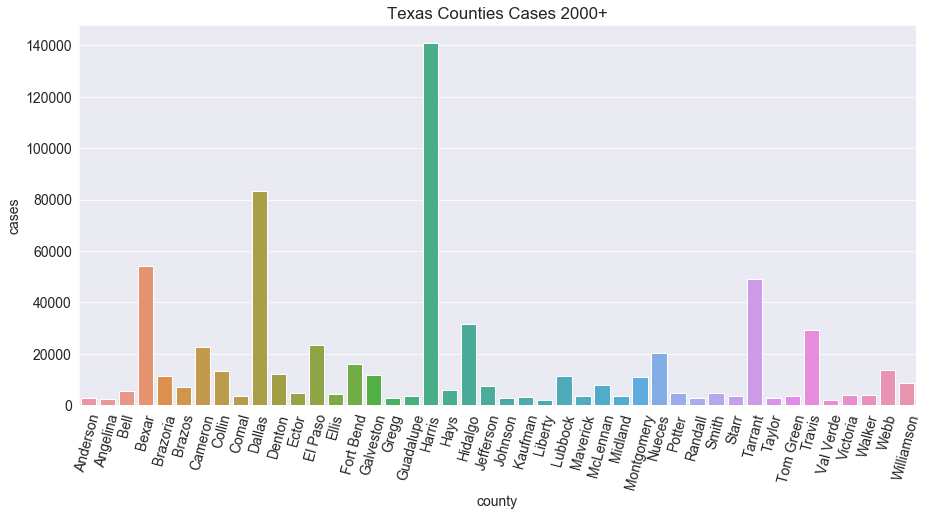

In [48]:
plt.title("Texas Counties Cases 2000+")
plt.xticks(rotation=75)
sns.barplot(counties_cases[counties_cases>=2000].index, counties_cases[counties_cases>=2000]);

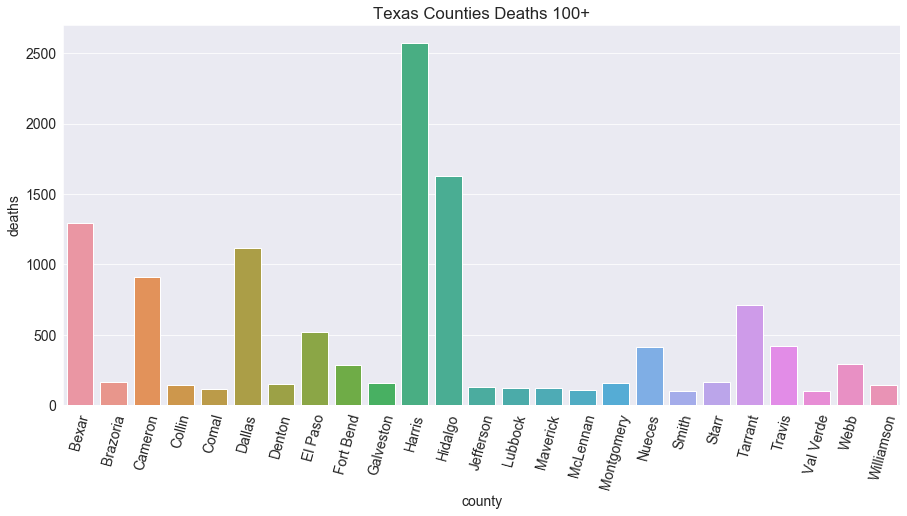

In [49]:
plt.title("Texas Counties Deaths 100+")
plt.xticks(rotation=75)
sns.barplot(counties_deaths[counties_deaths>100].index, counties_deaths[counties_deaths>100]);

In [51]:
county_death_rates = (counties_deaths/counties_cases)*100
county_death_rates

county
Anderson    1.091549
Andrews     2.117647
Angelina    3.230953
Aransas     5.572755
Archer      1.149425
              ...   
Wood        4.380952
Yoakum      2.232143
Young       1.910828
Zapata      1.801802
Zavala      4.359673
Length: 253, dtype: float64

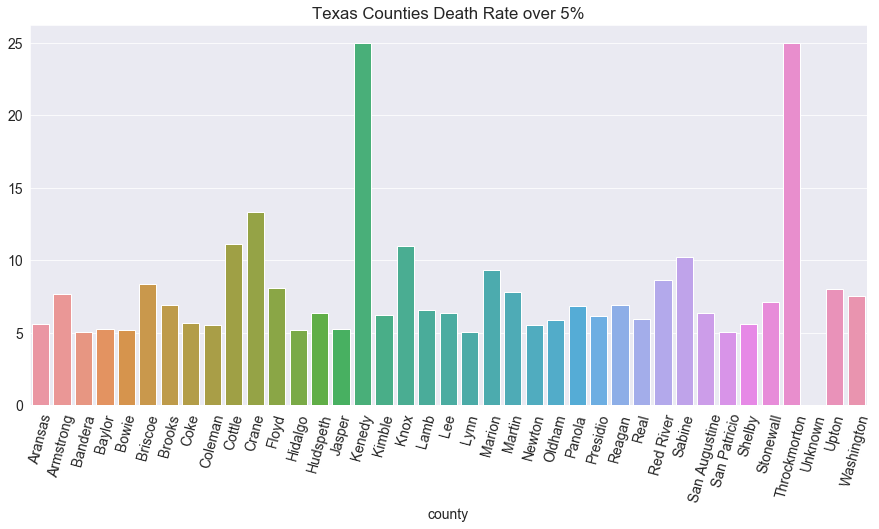

In [52]:
plt.title("Texas Counties Death Rate over 5%")
plt.xticks(rotation=75)
sns.barplot(county_death_rates[county_death_rates>5].index, county_death_rates[county_death_rates>5]);

In [55]:
usTx_merged_df

,date,US_positive,US_negative,US_pending,US_hospCurrently,US_hospCumulative,US_death,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,death
0,20200304,281,1417,103.0,NaN,4.0,16.0,TX,1.0,NaN,NaN,NaN,NaN,NaN
1,20200305,388,1949,197.0,NaN,5.0,20.0,TX,1.0,NaN,NaN,NaN,NaN,NaN
2,20200306,500,2672,458.0,NaN,6.0,26.0,TX,5.0,NaN,NaN,NaN,NaN,NaN
3,20200307,678,3333,602.0,NaN,6.0,27.0,TX,8.0,NaN,NaN,NaN,NaN,NaN
4,20200308,876,4049,347.0,NaN,6.0,31.0,TX,8.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,20200923,6898139,87416375,10535.0,29905.0,399252.0,193931.0,TX,719599.0,5021075.0,NaN,3195.0,NaN,15129.0
204,20200924,6941911,88239824,12008.0,30043.0,400840.0,194852.0,TX,723919.0,5136914.0,NaN,3204.0,NaN,15267.0
205,20200925,6997437,89096343,10905.0,29769.0,402171.0,195696.0,TX,728552.0,5184897.0,NaN,3221.0,NaN,15364.0
206,20200926,7045170,89982483,11183.0,29554.0,403325.0,196562.0,TX,733438.0,5261375.0,NaN,3209.0,NaN,15485.0


In [59]:
usTx_merged_df['date'] = pd.to_datetime(usTx_merged_df.date, format='%Y%m%d')
usTx_merged_df

,date,US_positive,US_negative,US_pending,US_hospCurrently,US_hospCumulative,US_death,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,death
0,2020-03-04,281,1417,103.0,NaN,4.0,16.0,TX,1.0,NaN,NaN,NaN,NaN,NaN
1,2020-03-05,388,1949,197.0,NaN,5.0,20.0,TX,1.0,NaN,NaN,NaN,NaN,NaN
2,2020-03-06,500,2672,458.0,NaN,6.0,26.0,TX,5.0,NaN,NaN,NaN,NaN,NaN
3,2020-03-07,678,3333,602.0,NaN,6.0,27.0,TX,8.0,NaN,NaN,NaN,NaN,NaN
4,2020-03-08,876,4049,347.0,NaN,6.0,31.0,TX,8.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2020-09-23,6898139,87416375,10535.0,29905.0,399252.0,193931.0,TX,719599.0,5021075.0,NaN,3195.0,NaN,15129.0
204,2020-09-24,6941911,88239824,12008.0,30043.0,400840.0,194852.0,TX,723919.0,5136914.0,NaN,3204.0,NaN,15267.0
205,2020-09-25,6997437,89096343,10905.0,29769.0,402171.0,195696.0,TX,728552.0,5184897.0,NaN,3221.0,NaN,15364.0
206,2020-09-26,7045170,89982483,11183.0,29554.0,403325.0,196562.0,TX,733438.0,5261375.0,NaN,3209.0,NaN,15485.0


Text(0, 0.5, '# of Positive Cases')

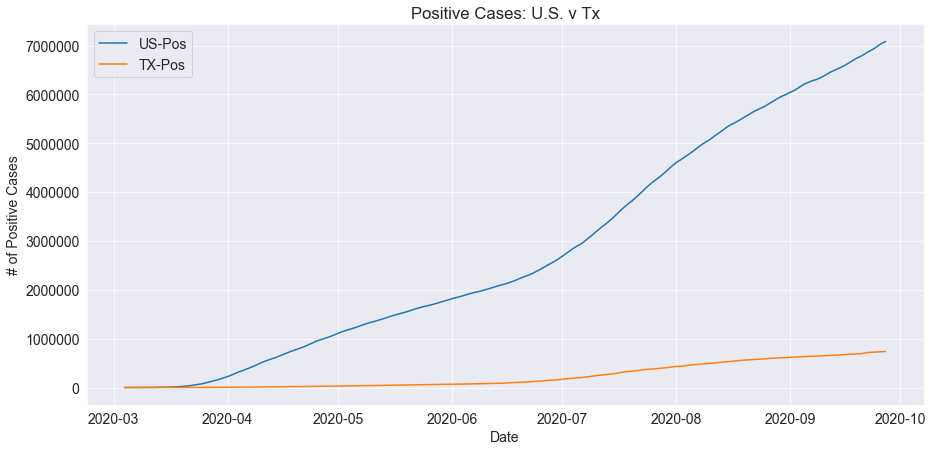

In [66]:
plt.title('Positive Cases: U.S. v Tx')
plt.plot(usTx_merged_df.date, usTx_merged_df.US_positive)
plt.plot(usTx_merged_df.date, usTx_merged_df.positive)

plt.legend(["US-Pos", "TX-Pos"])
plt.xlabel('Date')
plt.ylabel('# of Positive Cases')

Text(0, 0.5, '# of Deaths')

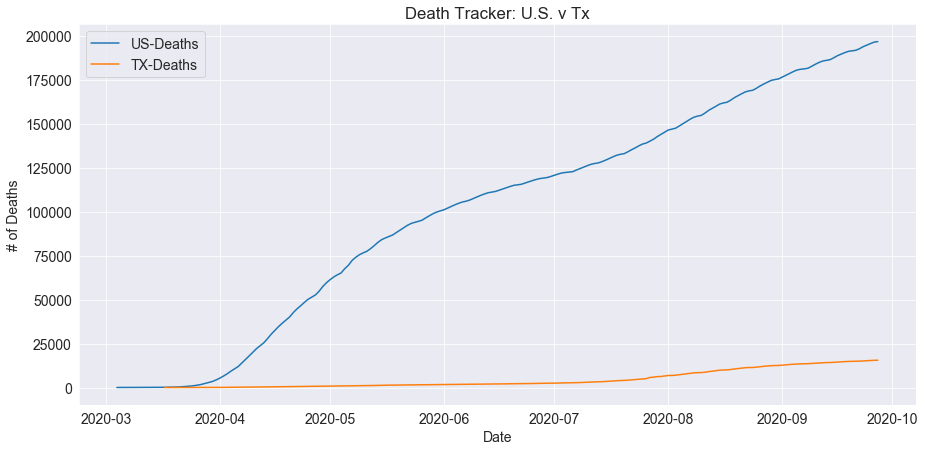

In [67]:
plt.title('Death Tracker: U.S. v Tx')
plt.plot(usTx_merged_df.date, usTx_merged_df.US_death)
plt.plot(usTx_merged_df.date, usTx_merged_df.death)

plt.legend(["US-Deaths", "TX-Deaths"])
plt.xlabel('Date')
plt.ylabel('# of Deaths')

In [70]:
tx_hosp_mean = usTx_merged_df.hospitalizedCurrently.mean()
tx_hosp_mean

4316.563535911602

In [71]:
us_hosp_mean = usTx_merged_df.US_hospCurrently.mean()
us_hosp_mean

39691.75384615385

Text(0, 0.5, '# of hospitalized per day')

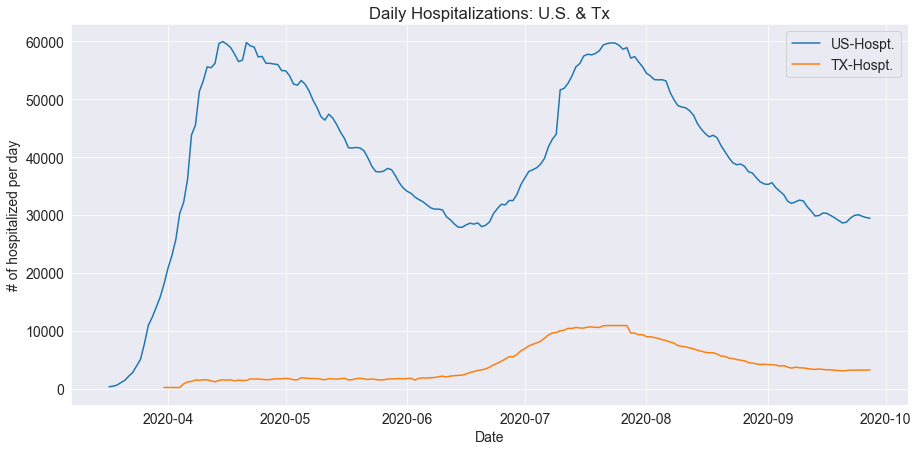

In [76]:
plt.title('Daily Hospitalizations: U.S. & Tx')
plt.plot(usTx_merged_df.date, usTx_merged_df.US_hospCurrently)
plt.plot(usTx_merged_df.date, usTx_merged_df.hospitalizedCurrently)

plt.legend(["US-Hospt.", "TX-Hospt."])
plt.xlabel('Date')
plt.ylabel('# of hospitalized per day')

In [77]:
import jovian

In [78]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "patlfer0078/course-project-usa-covid-cases" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/patlfer0078/course-project-usa-covid-cases


'https://jovian.ml/patlfer0078/course-project-usa-covid-cases'

In [84]:
counties_deaths.sort_values(ascending=False).head(10)

county
Harris     2572
Hidalgo    1630
Bexar      1297
Dallas     1120
Cameron     913
Tarrant     710
El Paso     521
Travis      422
Nueces      411
Webb        290
Name: deaths, dtype: int64

In [104]:
houston = counties_cases.Harris
san_antonio = counties_cases.Bexar
dallas = counties_cases.Dallas
austin = counties_cases.Travis
fort_worth = counties_cases.Tarrant
el_paso = counties_cases['El Paso']

In [115]:
six_counties_df = pd.DataFrame({'Cities':["Houston/Harris", "San Antonio/Bexar", "Dallas/Dallas", "Austin/Travis", "Fort Worth/Tarrant", "El Paso/El Paso"], 'tot_cases':[houston, san_antonio, dallas, austin, fort_worth, el_paso]})
six_counties_df

,Cities,tot_cases
0,Houston/Harris,140868
1,San Antonio/Bexar,54207
2,Dallas/Dallas,83304
3,Austin/Travis,29130
4,Fort Worth/Tarrant,49159
5,El Paso/El Paso,23604


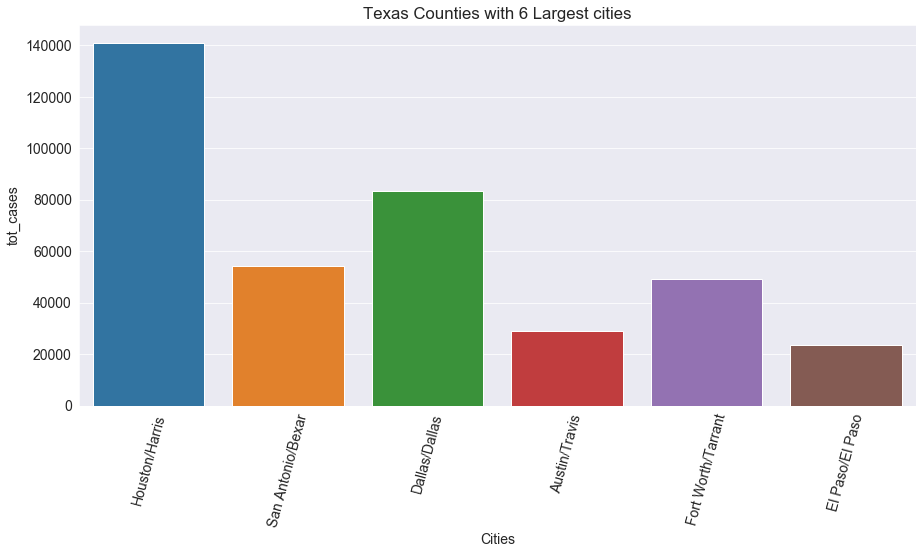

In [116]:
plt.title("Texas Counties with 6 Largest cities")
plt.xticks(rotation=75)
sns.barplot(six_counties_df.Cities, six_counties_df.tot_cases);


In [122]:
texas_df = states_df[states_df.state == "TX"]
texas_df = texas_df[['date', 'state', 'positive', 'negative', 'totalTestResults', 'positiveIncrease', 'total', 'totalTestResultsIncrease', 'death', 'deathIncrease']]
texas_df['date'] = pd.to_datetime(texas_df.date, format='%Y%m%d')
texas_df

,date,state,positive,negative,totalTestResults,positiveIncrease,total,totalTestResultsIncrease,death,deathIncrease
47,2020-09-27,TX,735132.0,5281775.0,6016907.0,1694,6016907,22094,15522.0,37
103,2020-09-26,TX,733438.0,5261375.0,5994813.0,4886,5994813,81364,15485.0,121
159,2020-09-25,TX,728552.0,5184897.0,5913449.0,4633,5913449,52616,15364.0,97
215,2020-09-24,TX,723919.0,5136914.0,5860833.0,4320,5860833,120159,15267.0,138
271,2020-09-23,TX,719599.0,5021075.0,5740674.0,3392,5740674,72942,15129.0,135
...,...,...,...,...,...,...,...,...,...,...
11376,2020-03-08,TX,8.0,NaN,8.0,0,8,0,NaN,0
11427,2020-03-07,TX,8.0,NaN,8.0,3,8,3,NaN,0
11466,2020-03-06,TX,5.0,NaN,5.0,4,5,4,NaN,0
11493,2020-03-05,TX,1.0,NaN,1.0,0,1,0,NaN,0


In [125]:
highest_increase=texas_df.positiveIncrease.max()
texas_df.loc[texas_df.positiveIncrease == highest_increase]

,date,state,positive,negative,totalTestResults,positiveIncrease,total,totalTestResultsIncrease,death,deathIncrease
327,2020-09-22,TX,716207.0,4951525.0,5667732.0,17820,5667732,45234,14994.0,77


In [134]:
positive_mean = texas_df.positive.mean()
death_mean = texas_df.death.mean()
texas_fatality_mean = death_mean/positive_mean

In [135]:
print("The mean fatality rate during the given data time for Texas is about {:.2f}%".format(texas_fatality_mean*100))

The mean fatality rate during the given data time for Texas is about 2.02%


In [138]:
county_death_rates.sort_values(ascending=False).head(5)

county
Unknown               inf
Kenedy          25.000000
Throckmorton    25.000000
Crane           13.333333
Cottle          11.111111
dtype: float64

In [139]:
import jovian

In [140]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "patlfer0078/course-project-usa-covid-cases" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/patlfer0078/course-project-usa-covid-cases


'https://jovian.ml/patlfer0078/course-project-usa-covid-cases'

In [141]:
import jovian

In [142]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "patlfer0078/course-project-usa-covid-cases" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/patlfer0078/course-project-usa-covid-cases


'https://jovian.ml/patlfer0078/course-project-usa-covid-cases'

In [145]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
